In [3]:
import pandas as pd
import warnings
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import CausalnexDataset as cd


file = '../preprocess_mars_express/MarsExpressPower/marsexpress_dataset_one_NPWD.csv'
a = cd.CausalnexDataset(dataset=file, delimiter_char=",", columns_to_drop=["ut_ms"], threshold=0, dropna=True)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


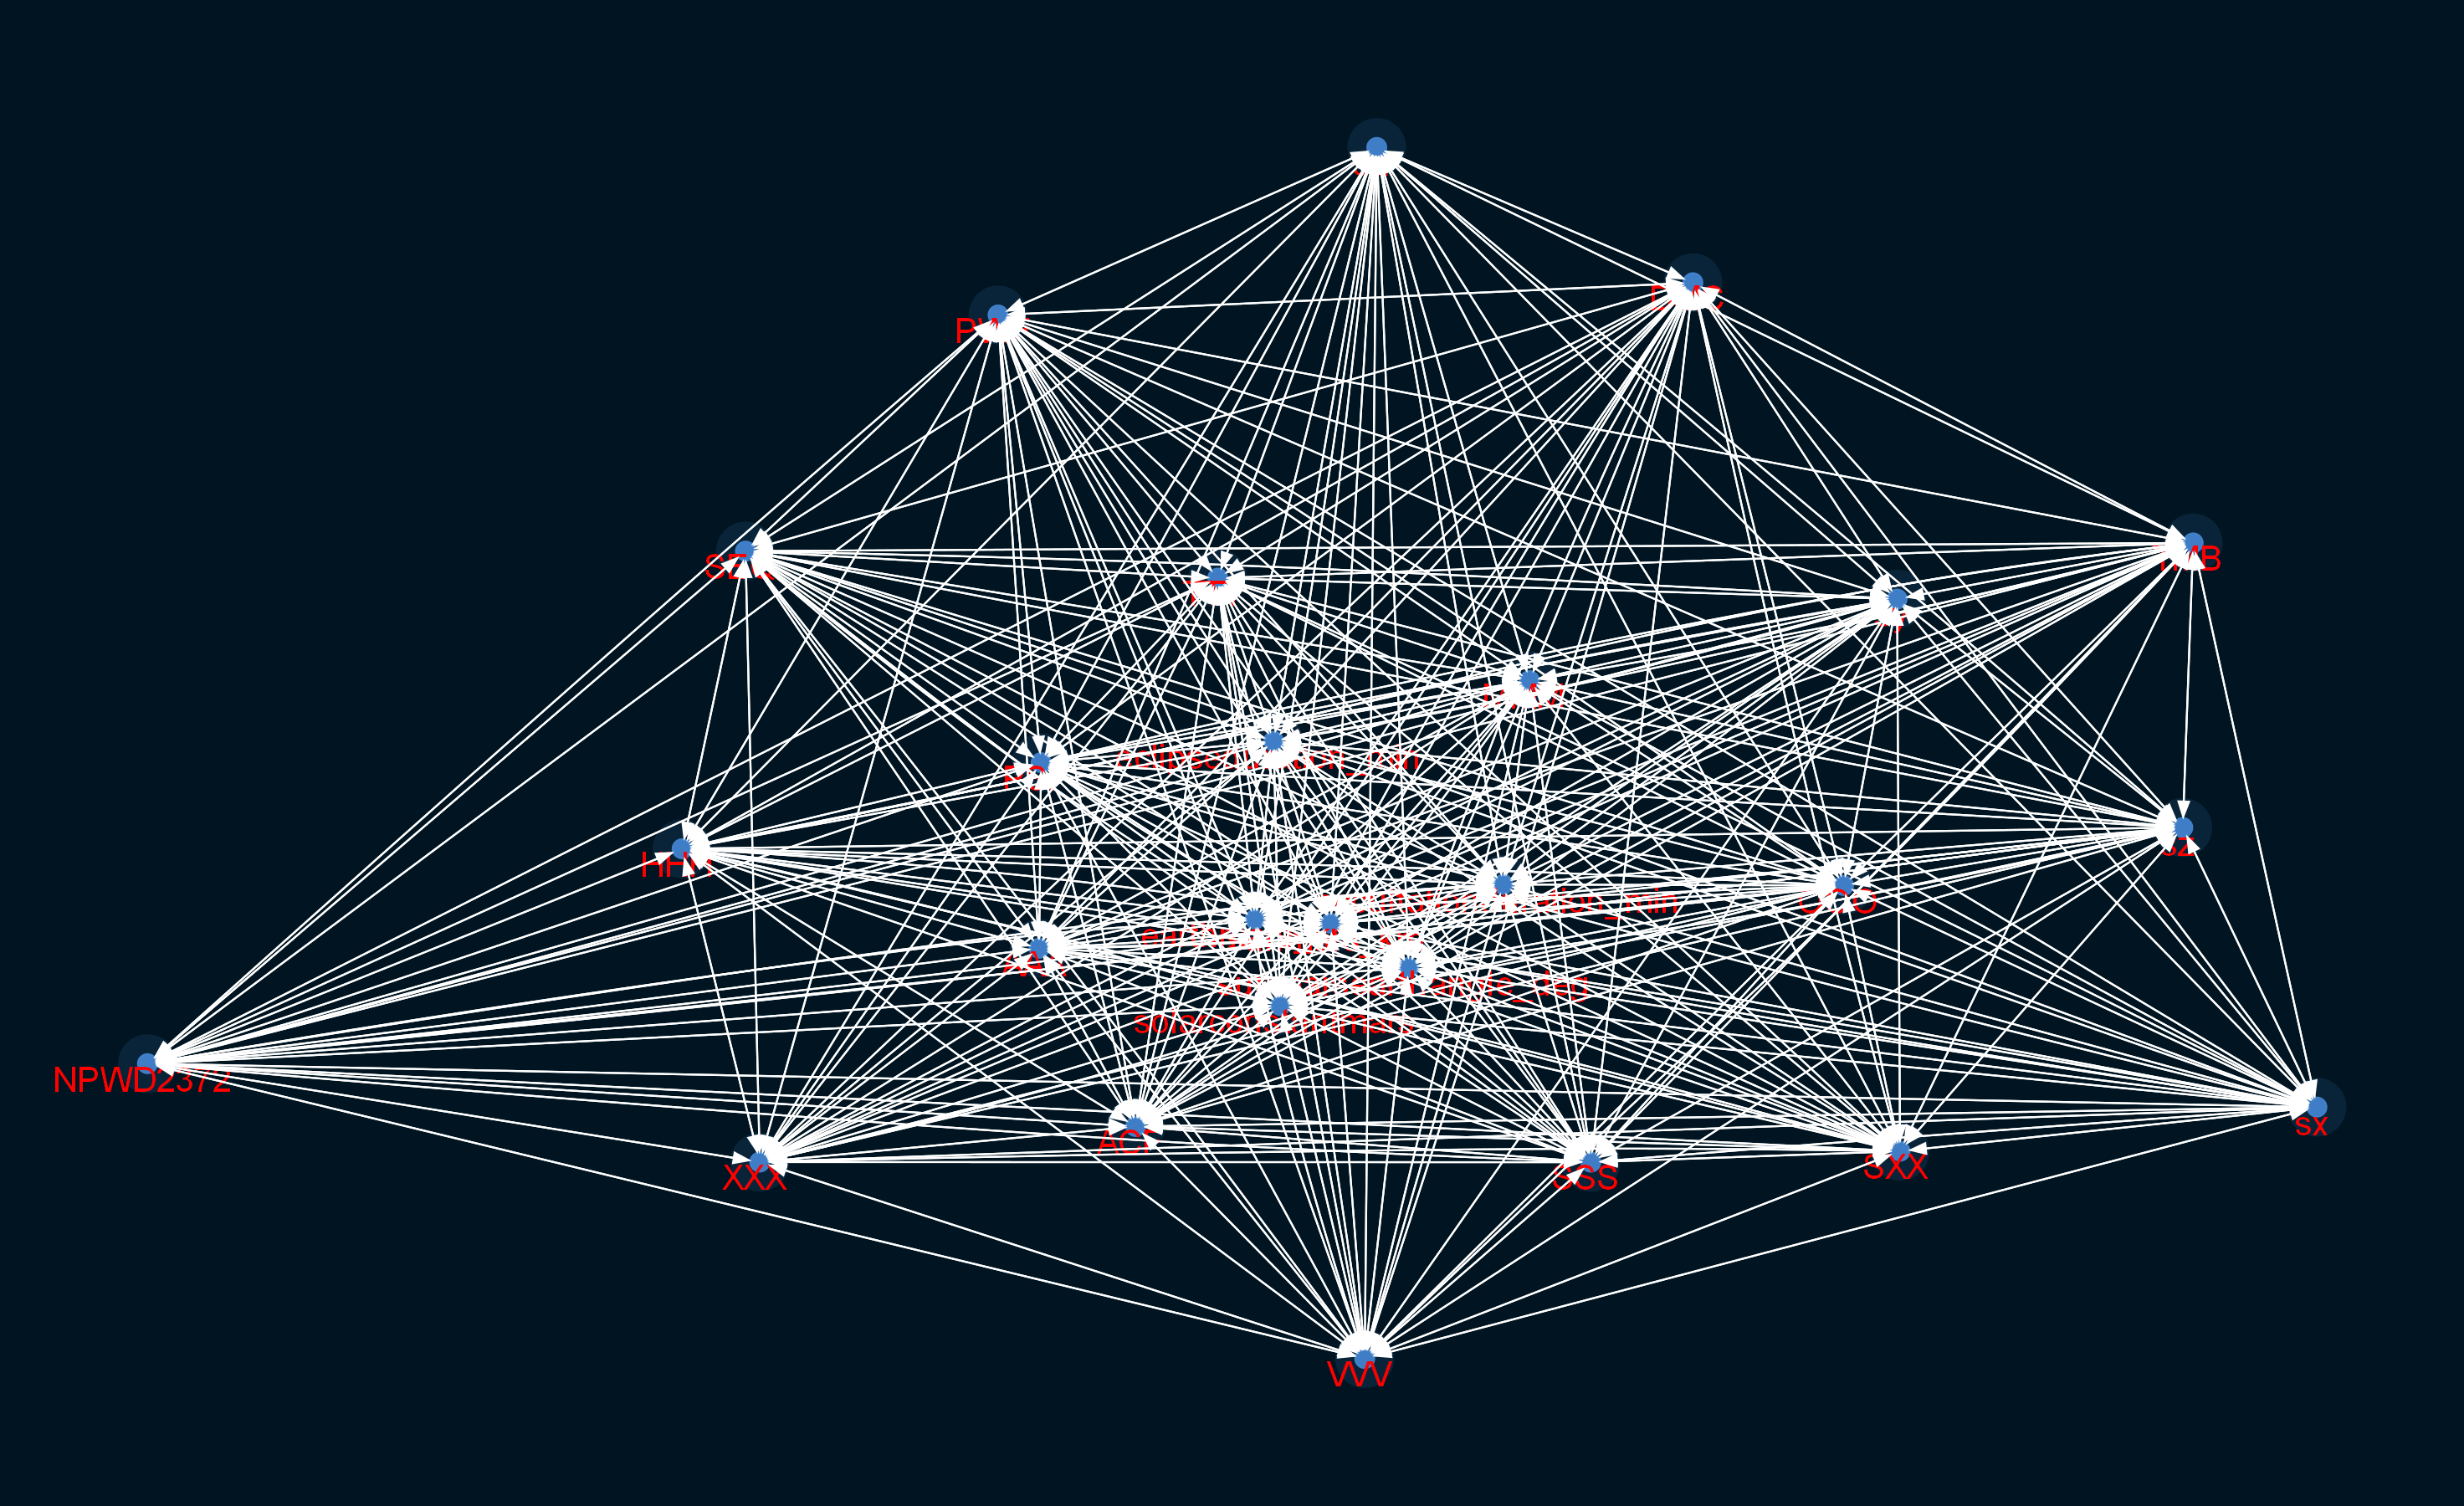

In [4]:


npwd_node = "NPWD2372"
viz = a.get_graph(specific_nodes=npwd_node)

Image(viz.draw(format="png"))

In [11]:
# Obtenemos los datos estadísticos de la matriz de adyancencia para planear un cribado de las relaciones espurias y menos relevantes


a.get_edges_data(specific_nodes=npwd_node)

weight
count  5.000000e+01
mean   3.755441e-03
std    1.862516e-02
min    2.649404e-13
25%    2.897936e-11
50%    3.738383e-10
75%    5.392598e-09
max    9.999314e-02

Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


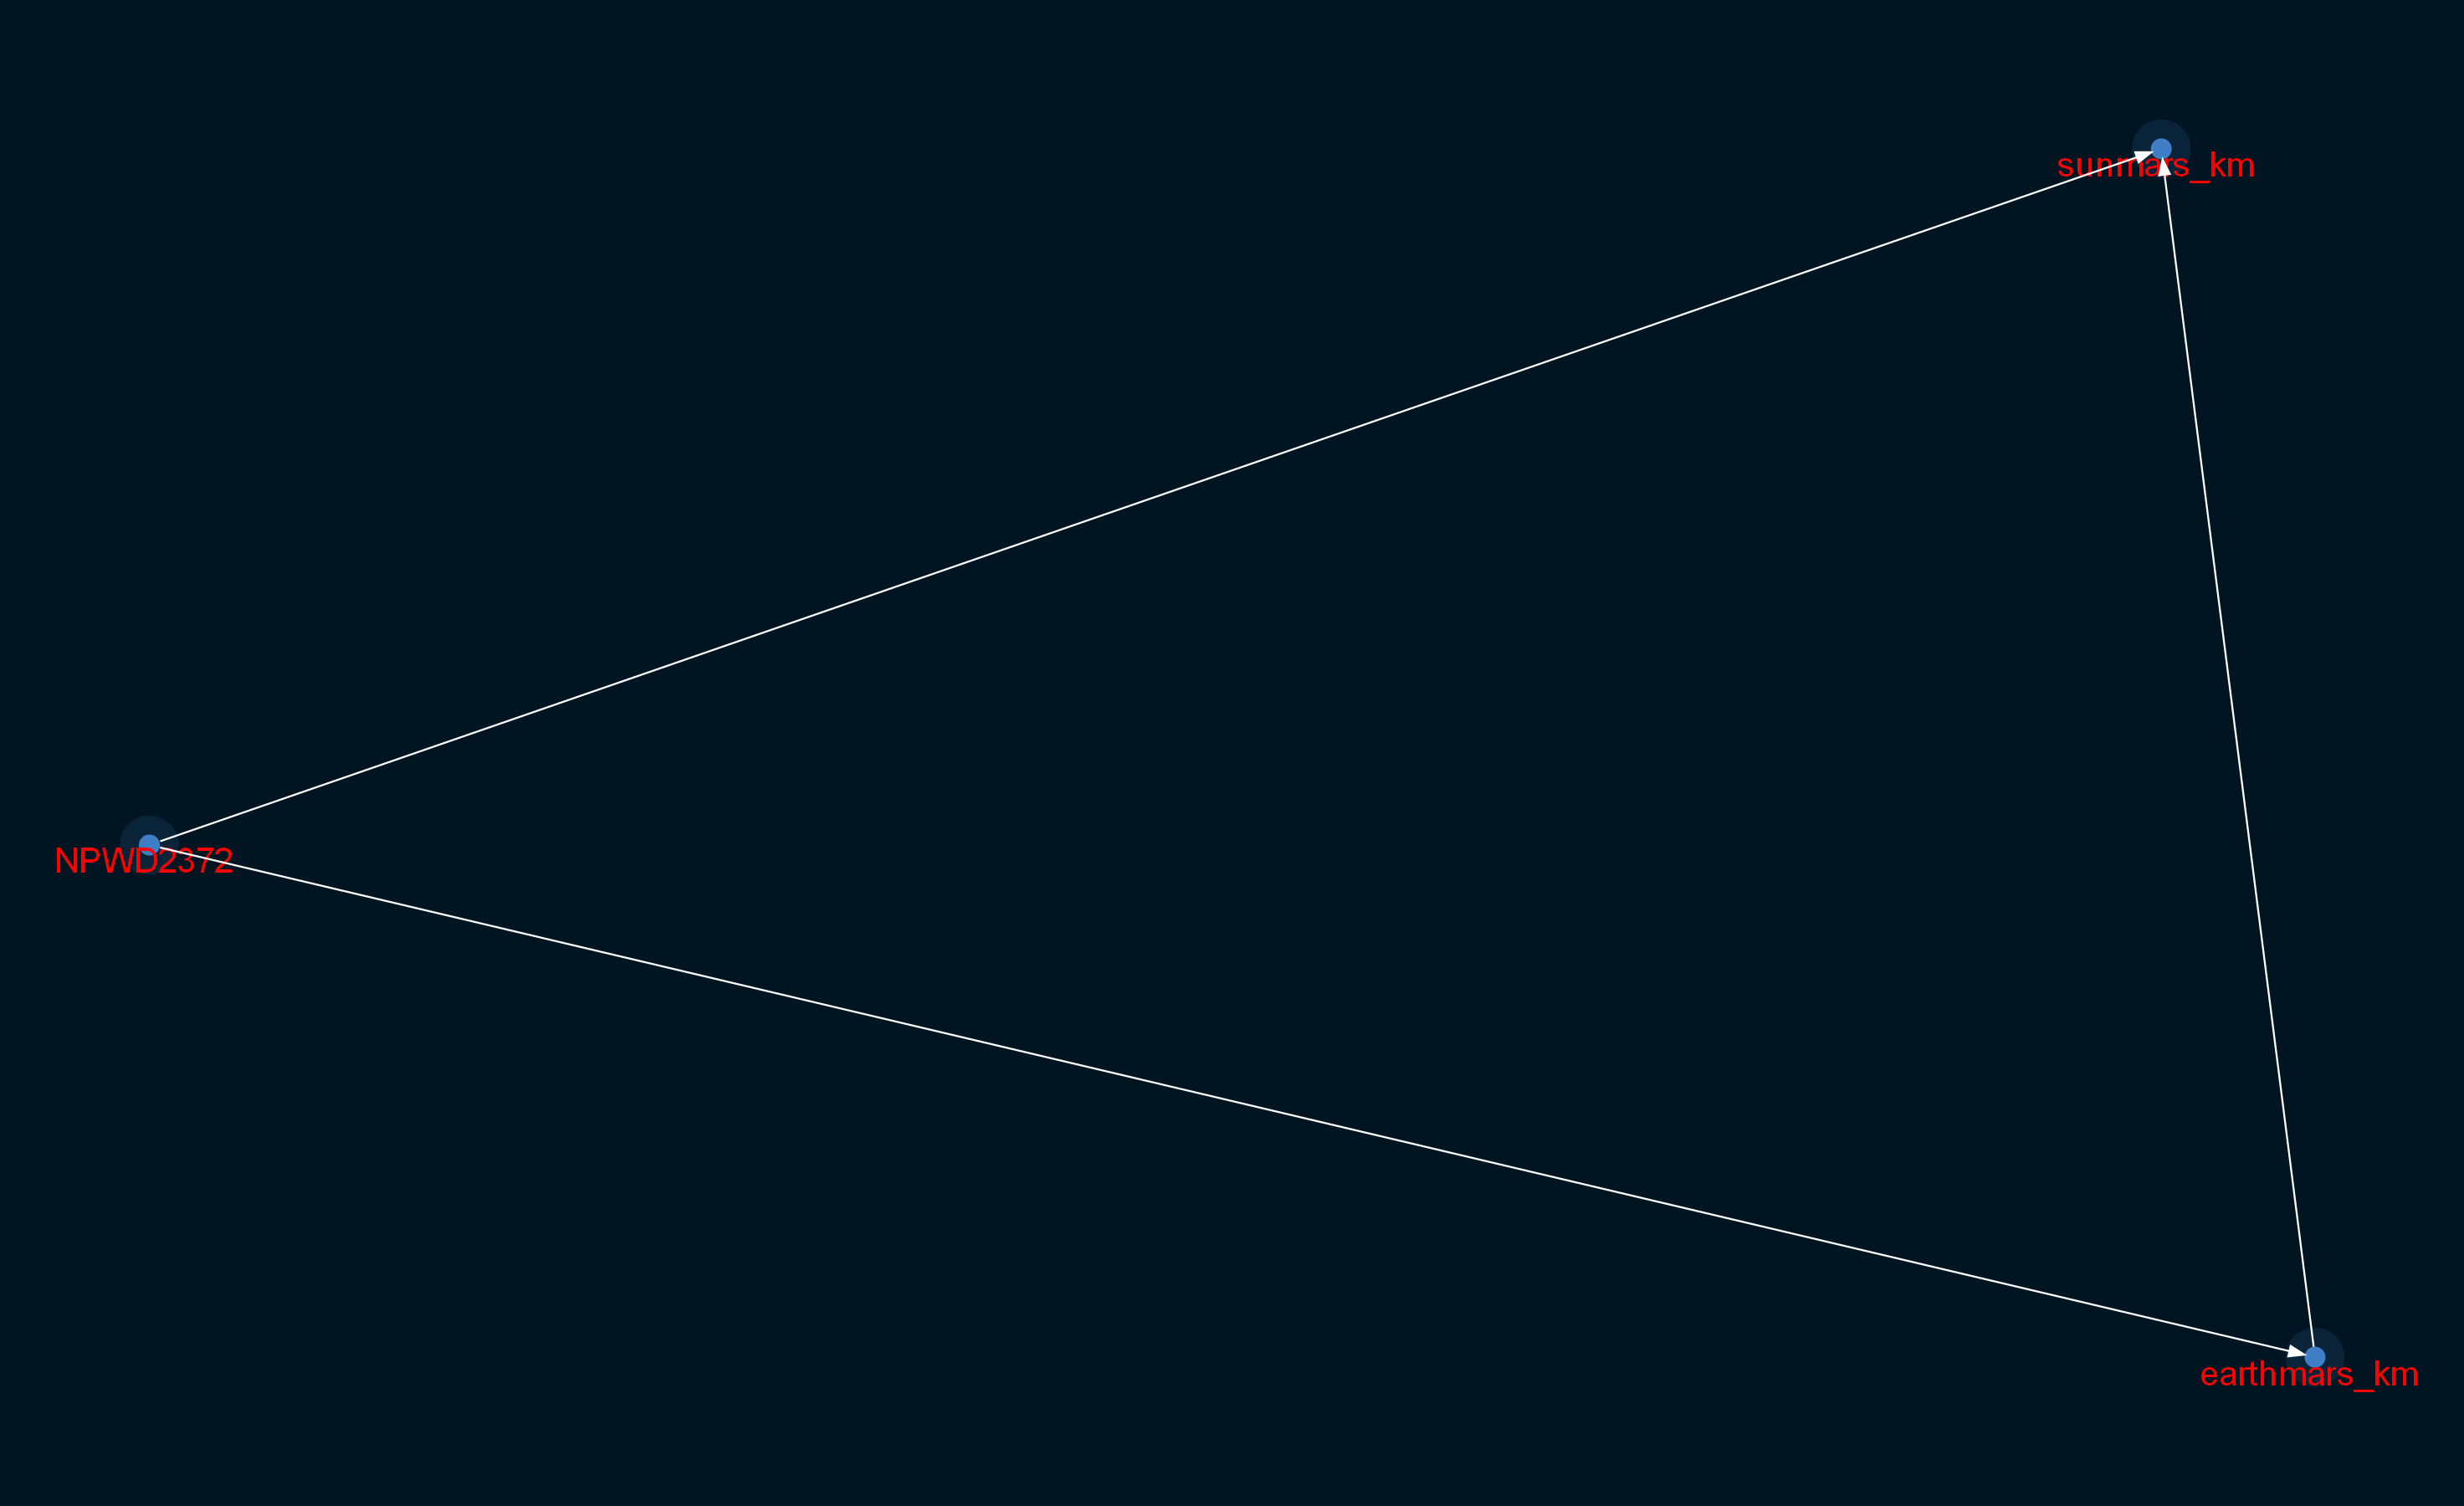

In [20]:
# Aunque la media no es un valor muy representativo por quedar muy por encima de los tres cuartiles, la elegiremos en este caso para compensar la gran cantidad de pesos demasiado pequeños.
# Utilizaremos esta media para quedarnos solo con aquellos nodos con pesos que la superen y utilizarla como umbral de pesos en el grafo. 
mean = 3.755441e-03
a.reset_threshold(mean)
viz = a.get_graph(specific_nodes=npwd_node)

Image(viz.draw(format="png"))

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


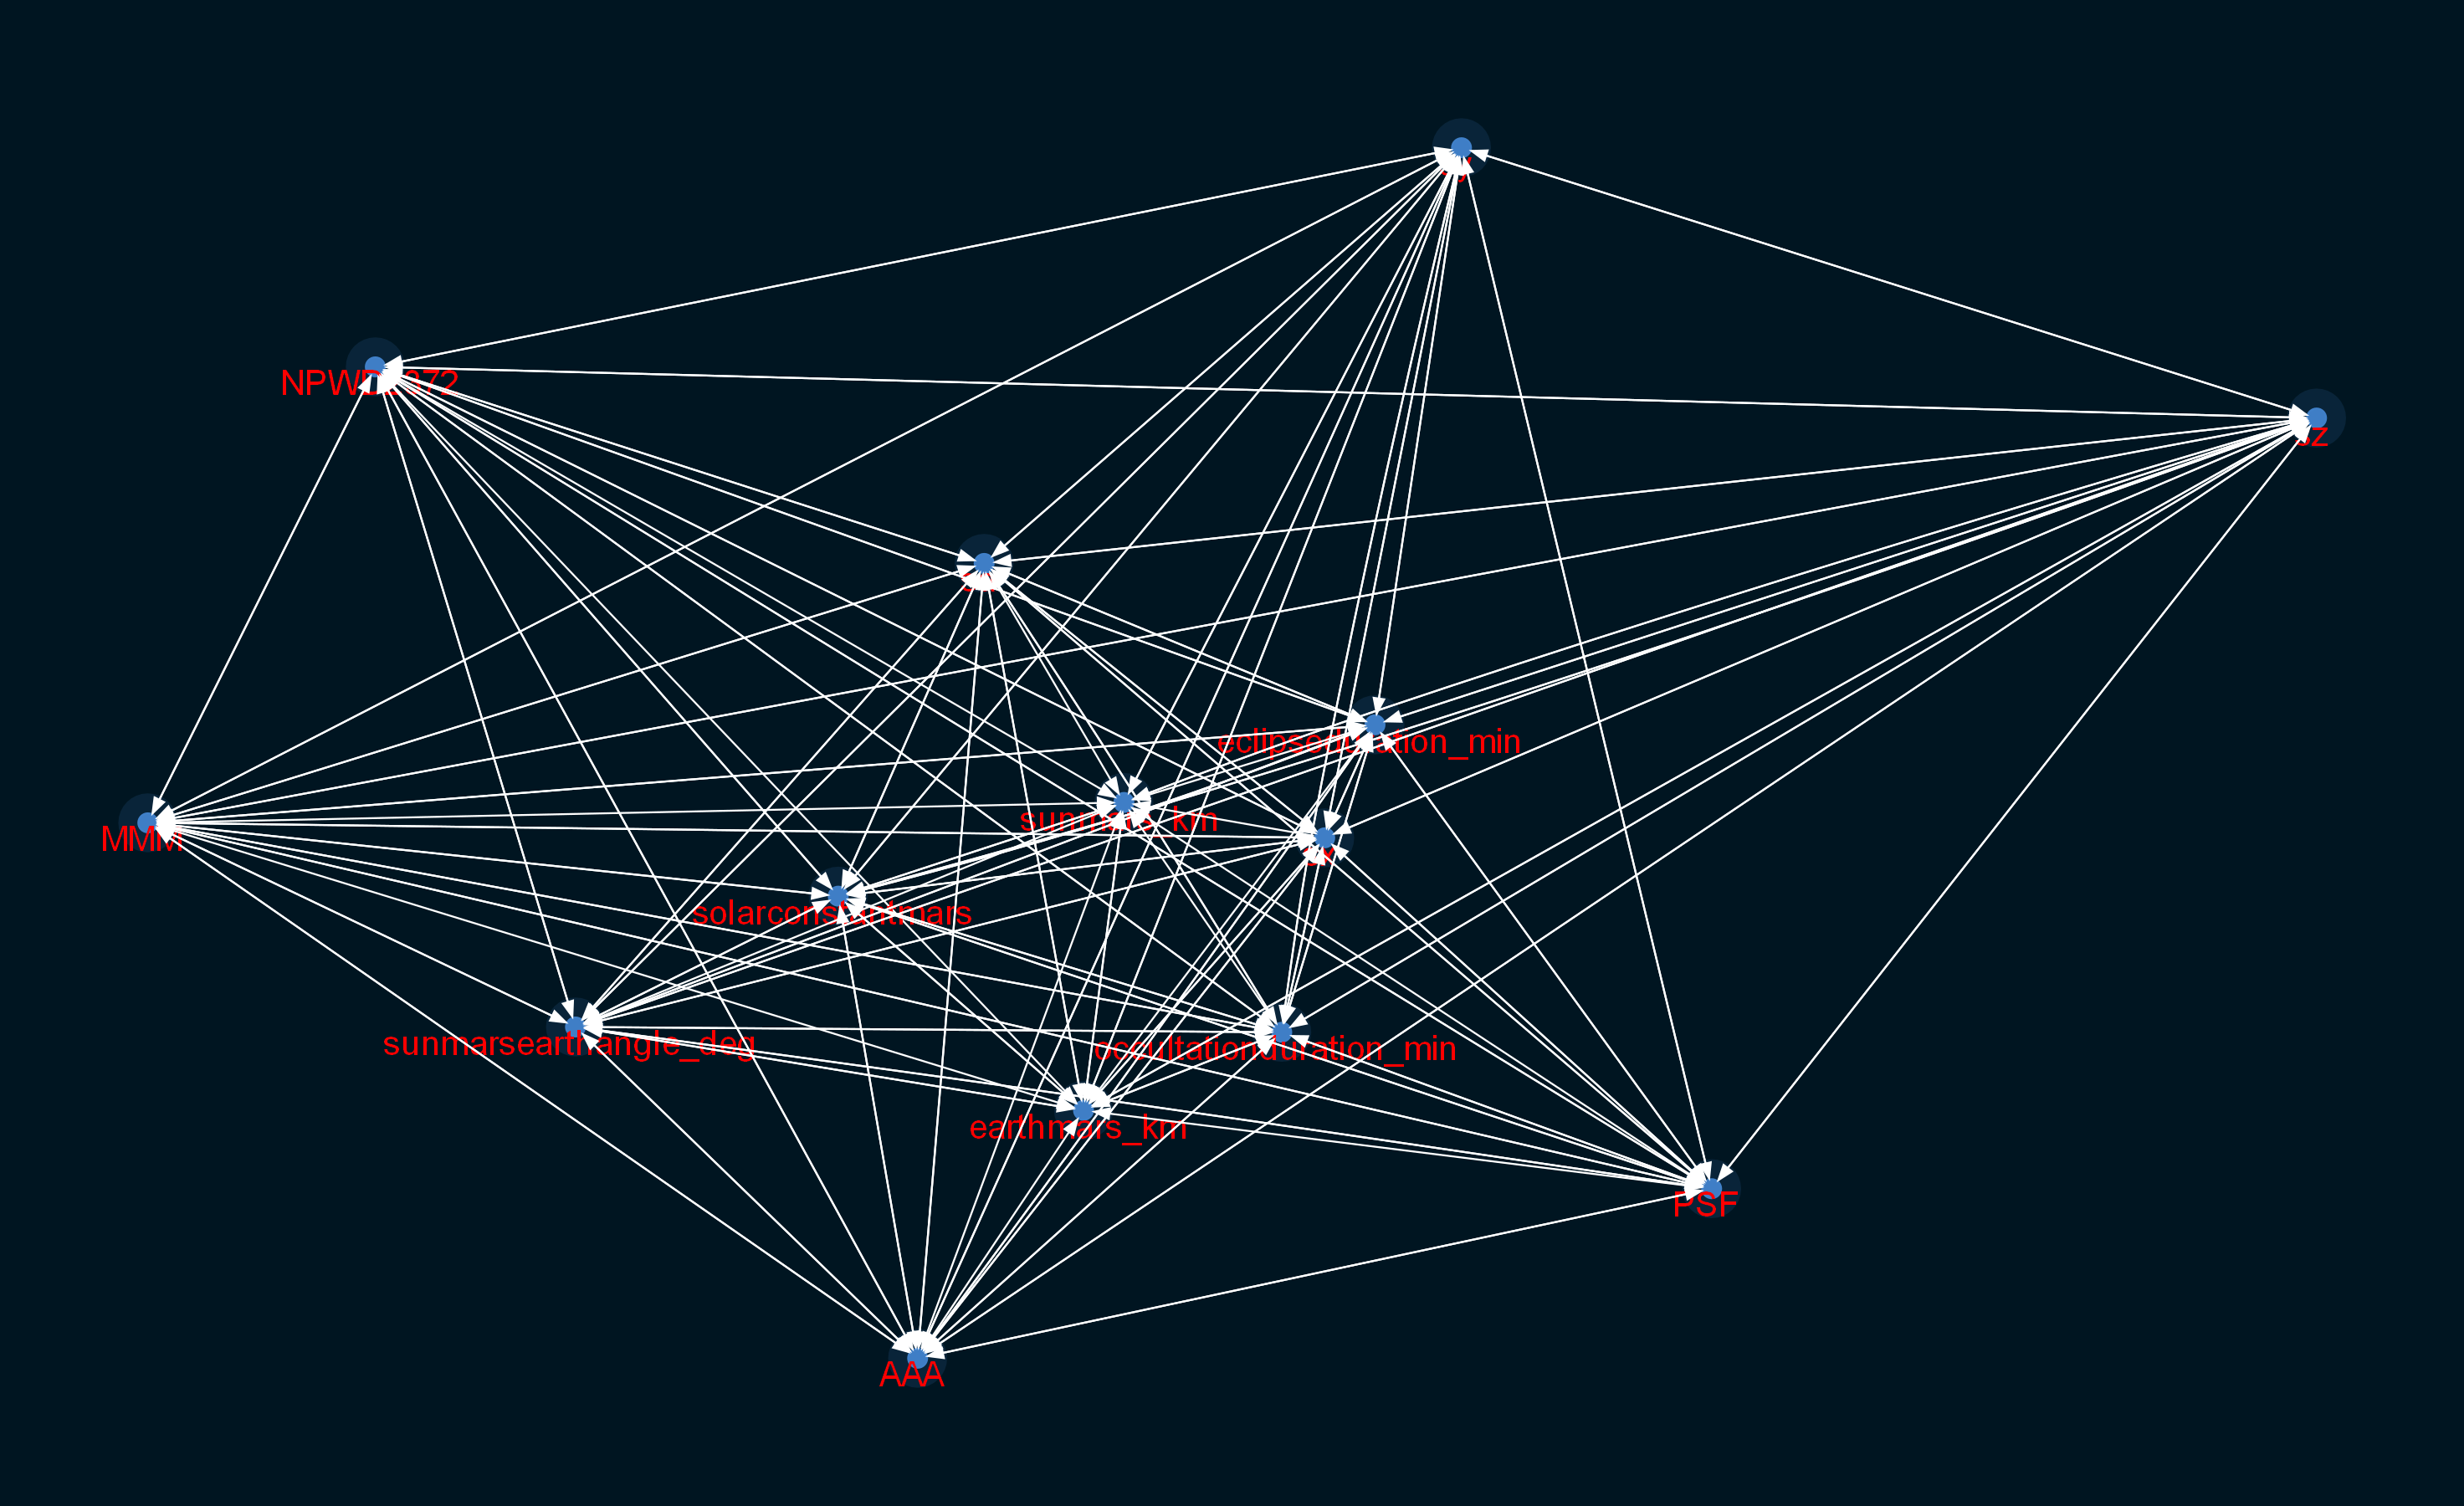

In [26]:
# Aunque la media no es un valor muy representativo por quedar muy por encima de los tres cuartiles, la elegiremos en este caso para compensar la gran cantidad de pesos demasiado pequeños.
# Utilizaremos esta media para quedarnos solo con aquellos nodos con pesos que la superen y utilizarla como umbral de pesos en el grafo. 
q2 = 3.738383e-10
a.reset_threshold(q2)
viz = a.get_graph(specific_nodes=npwd_node)

Image(viz.draw(format="png"))

In [29]:
a.reset_threshold(0)
a.edges_to_dataframe(specific_nodes=npwd_node).sort_values(["weight"], ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


source                   target        weight
5                  NPWD2372             earthmars_km  9.999314e-02
4                  NPWD2372               sunmars_km  8.777512e-02
2                  NPWD2372                       sy  7.832404e-07
27                       sy                 NPWD2372  7.832404e-07
3                  NPWD2372                       sz  7.528631e-07
28                       sz                 NPWD2372  7.528631e-07
1                  NPWD2372                       sx  1.613901e-07
26                       sx                 NPWD2372  1.613901e-07
7                  NPWD2372        solarconstantmars  1.416512e-07
32        solarconstantmars                 NPWD2372  1.416512e-07
0                  NPWD2372                       sa  2.989721e-08
25                       sa                 NPWD2372  2.989721e-08
6                  NPWD2372    sunmarsearthangle_deg  5.392598e-09
31    sunmarsearthangle_deg                 NPWD2372  5.392598e-09
34  occultationduration_min                 NPWD2372  4.180601e-09
9                  NPWD2372  occultationduration_min  4.180601e-09
8                  NPWD2372      eclipseduration_min  3.839260e-09
33      eclipseduration_min                 NPWD2372  3.839260e-09
39                      PSF                 NPWD2372  6.238660e-10
14                 NPWD2372                      PSF  6.238660e-10
10                 NPWD2372                      AAA  5.114974e-10
35                      AAA                 NPWD2372  5.114974e-10
37                      MMM                 NPWD2372  3.929403e-10
12                 NPWD2372                      MMM  3.929403e-10
23                 NPWD2372                      ACF  3.738383e-10
48                      ACF                 NPWD2372  3.738383e-10
45                      TTT                 NPWD2372  1.676153e-10
20                 NPWD2372                      TTT  1.676153e-10
11                 NPWD2372                      HHH  1.065411e-10
36                      HHH                 NPWD2372  1.065411e-10
42                      SSS                 NPWD2372  9.799646e-11
17                 NPWD2372                      SSS  9.799646e-11
46                      VVV                 NPWD2372  9.474086e-11
21                 NPWD2372                      VVV  9.474086e-11
13                 NPWD2372                      OOO  8.144160e-11
38                      OOO                 NPWD2372  8.144160e-11
47                      XXX                 NPWD2372  2.897936e-11
22                 NPWD2372                      XXX  2.897936e-11
18                 NPWD2372                      SXX  1.991862e-11
43                      SXX                 NPWD2372  1.991862e-11
15                 NPWD2372                      PWF  1.013374e-11
40                      PWF                 NPWD2372  1.013374e-11
19                 NPWD2372                      TMB  8.358954e-12
44                      TMB                 NPWD2372  8.358954e-12
41                      SEQ                 NPWD2372  8.184714e-12
16                 NPWD2372                      SEQ  8.184714e-12
24                 NPWD2372                      DMC  3.902148e-12
49                      DMC                 NPWD2372  3.902148e-12
30             earthmars_km                 NPWD2372  3.135225e-12
29               sunmars_km                 NPWD2372  2.649404e-13

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


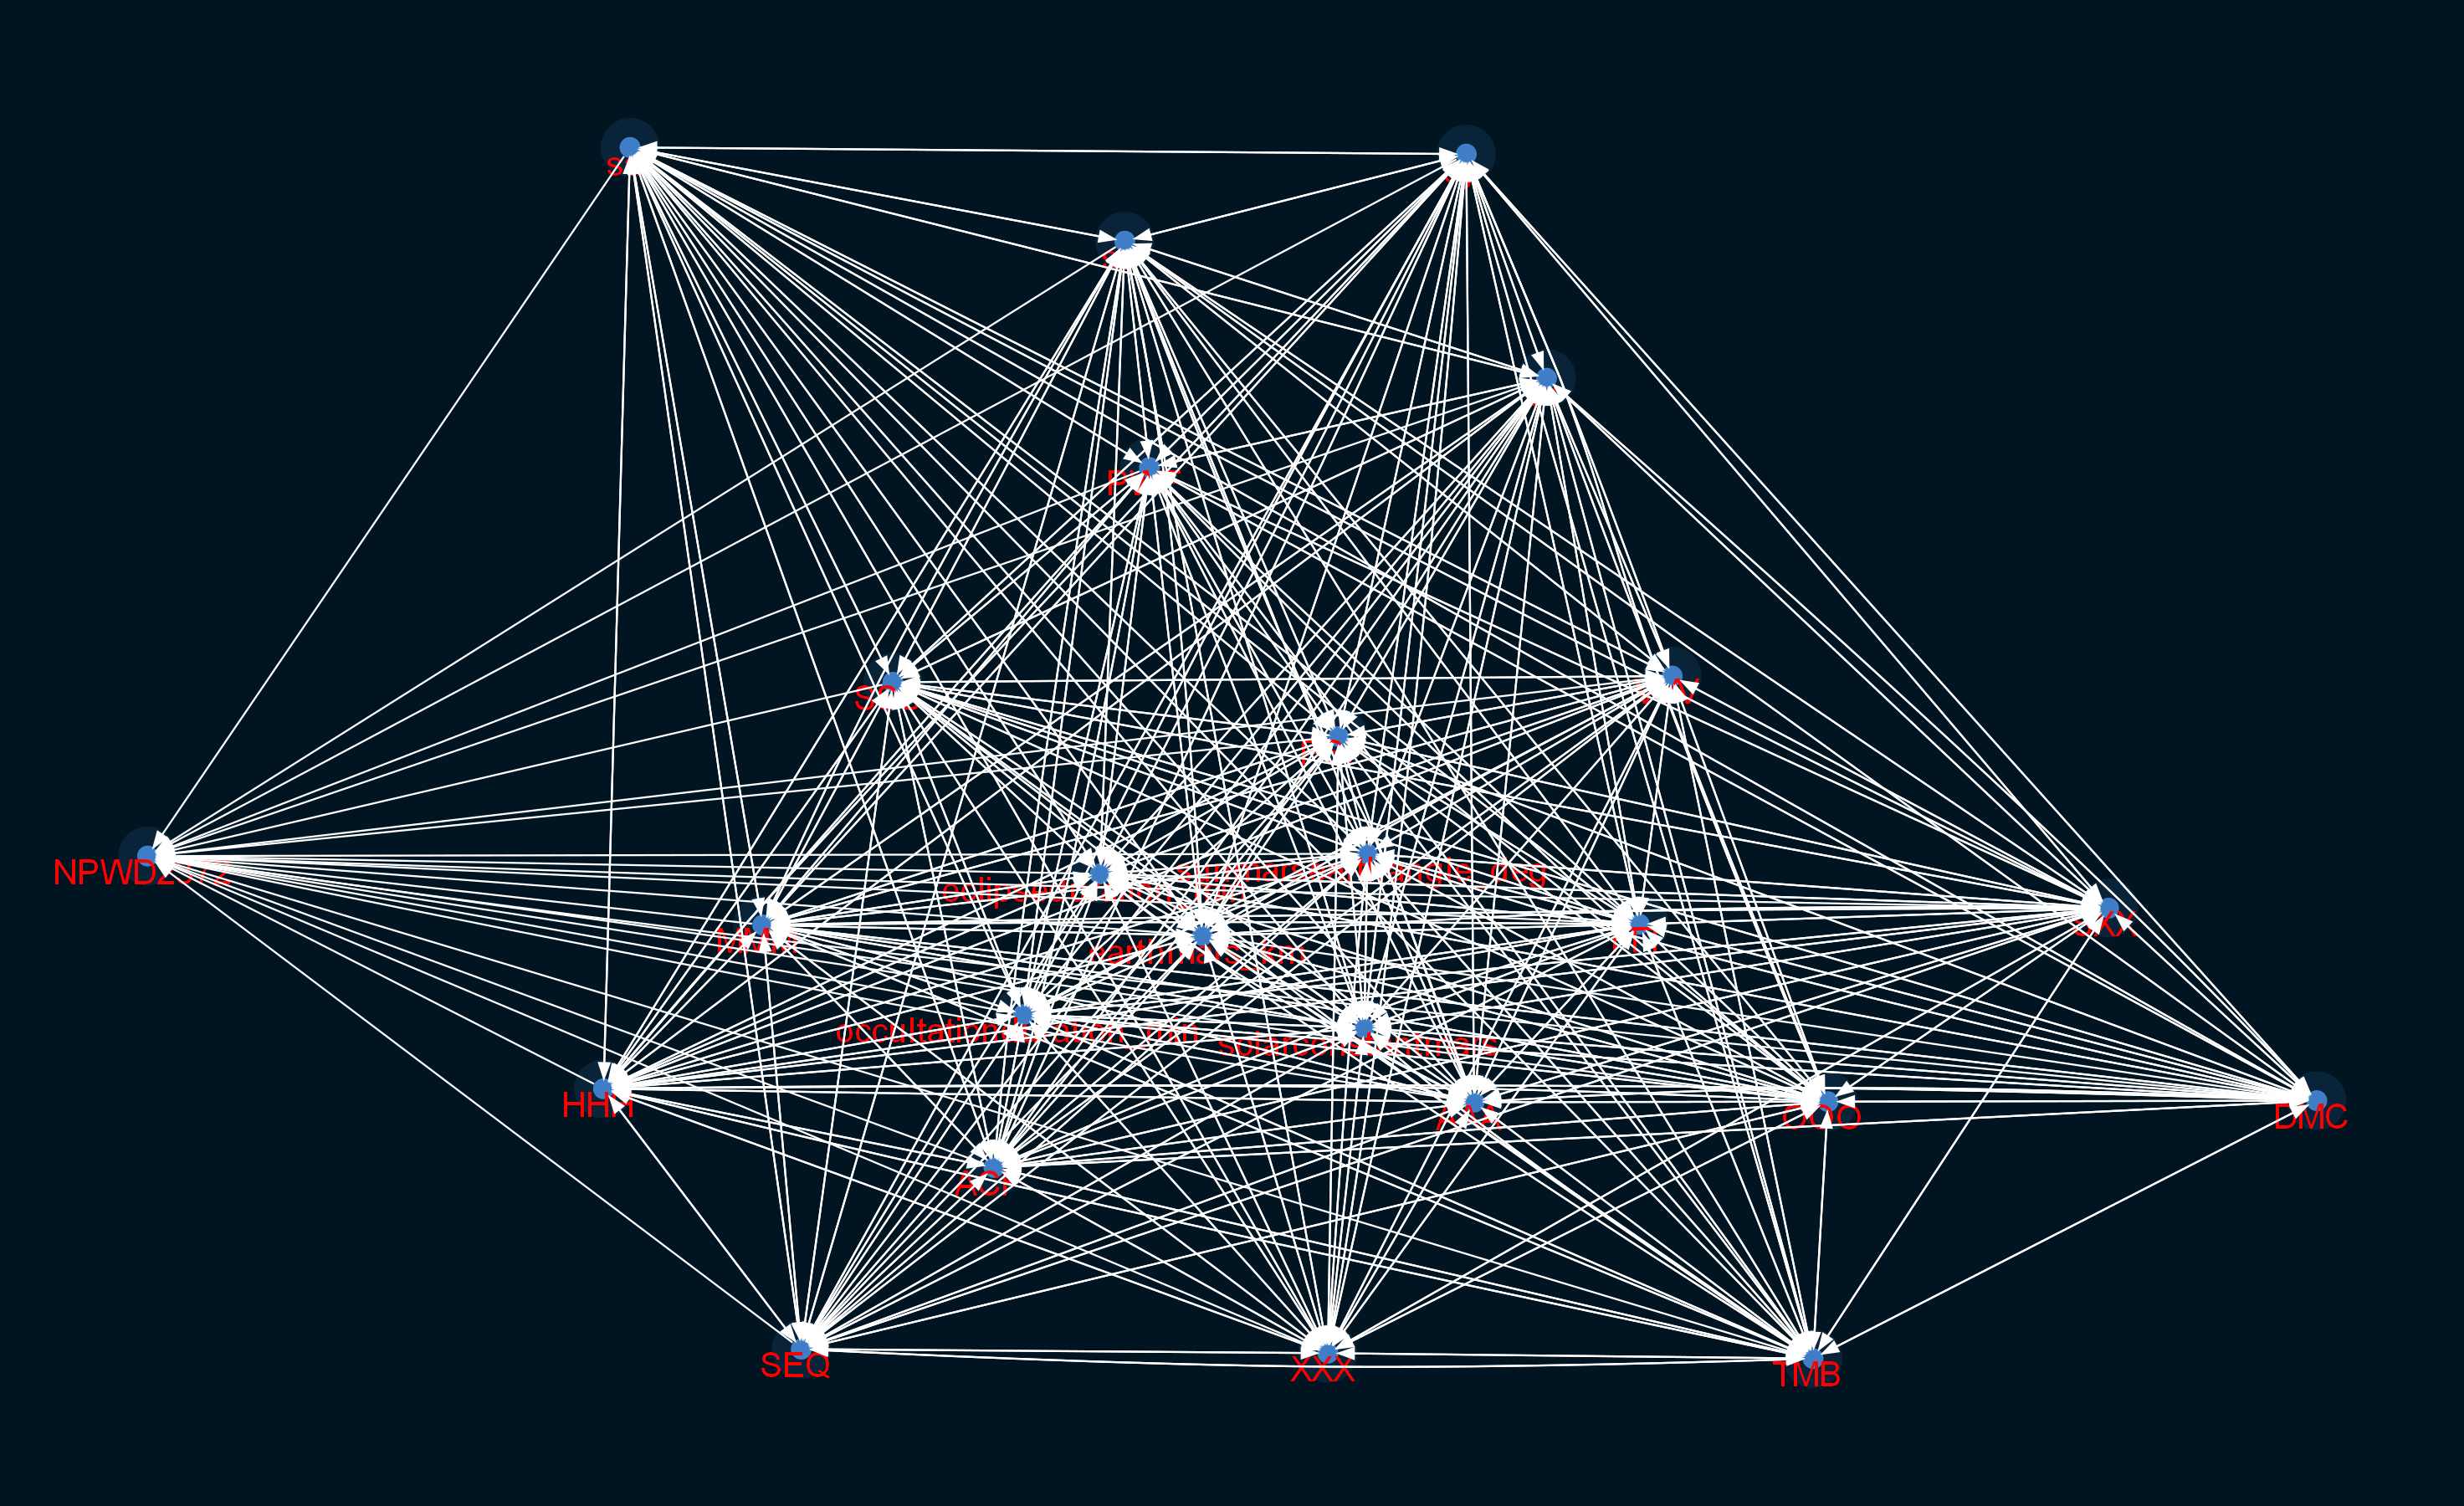

In [31]:
# Aunque la media no es un valor muy representativo por quedar muy por encima de los tres cuartiles, la elegiremos en este caso para compensar la gran cantidad de pesos demasiado pequeños.
# Utilizaremos esta media para quedarnos solo con aquellos nodos con pesos que la superen y utilizarla como umbral de pesos en el grafo. 
min = 2.649404e-13
a.reset_threshold(min)
viz = a.get_graph(specific_nodes=npwd_node)

Image(viz.draw(format="png"))

Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


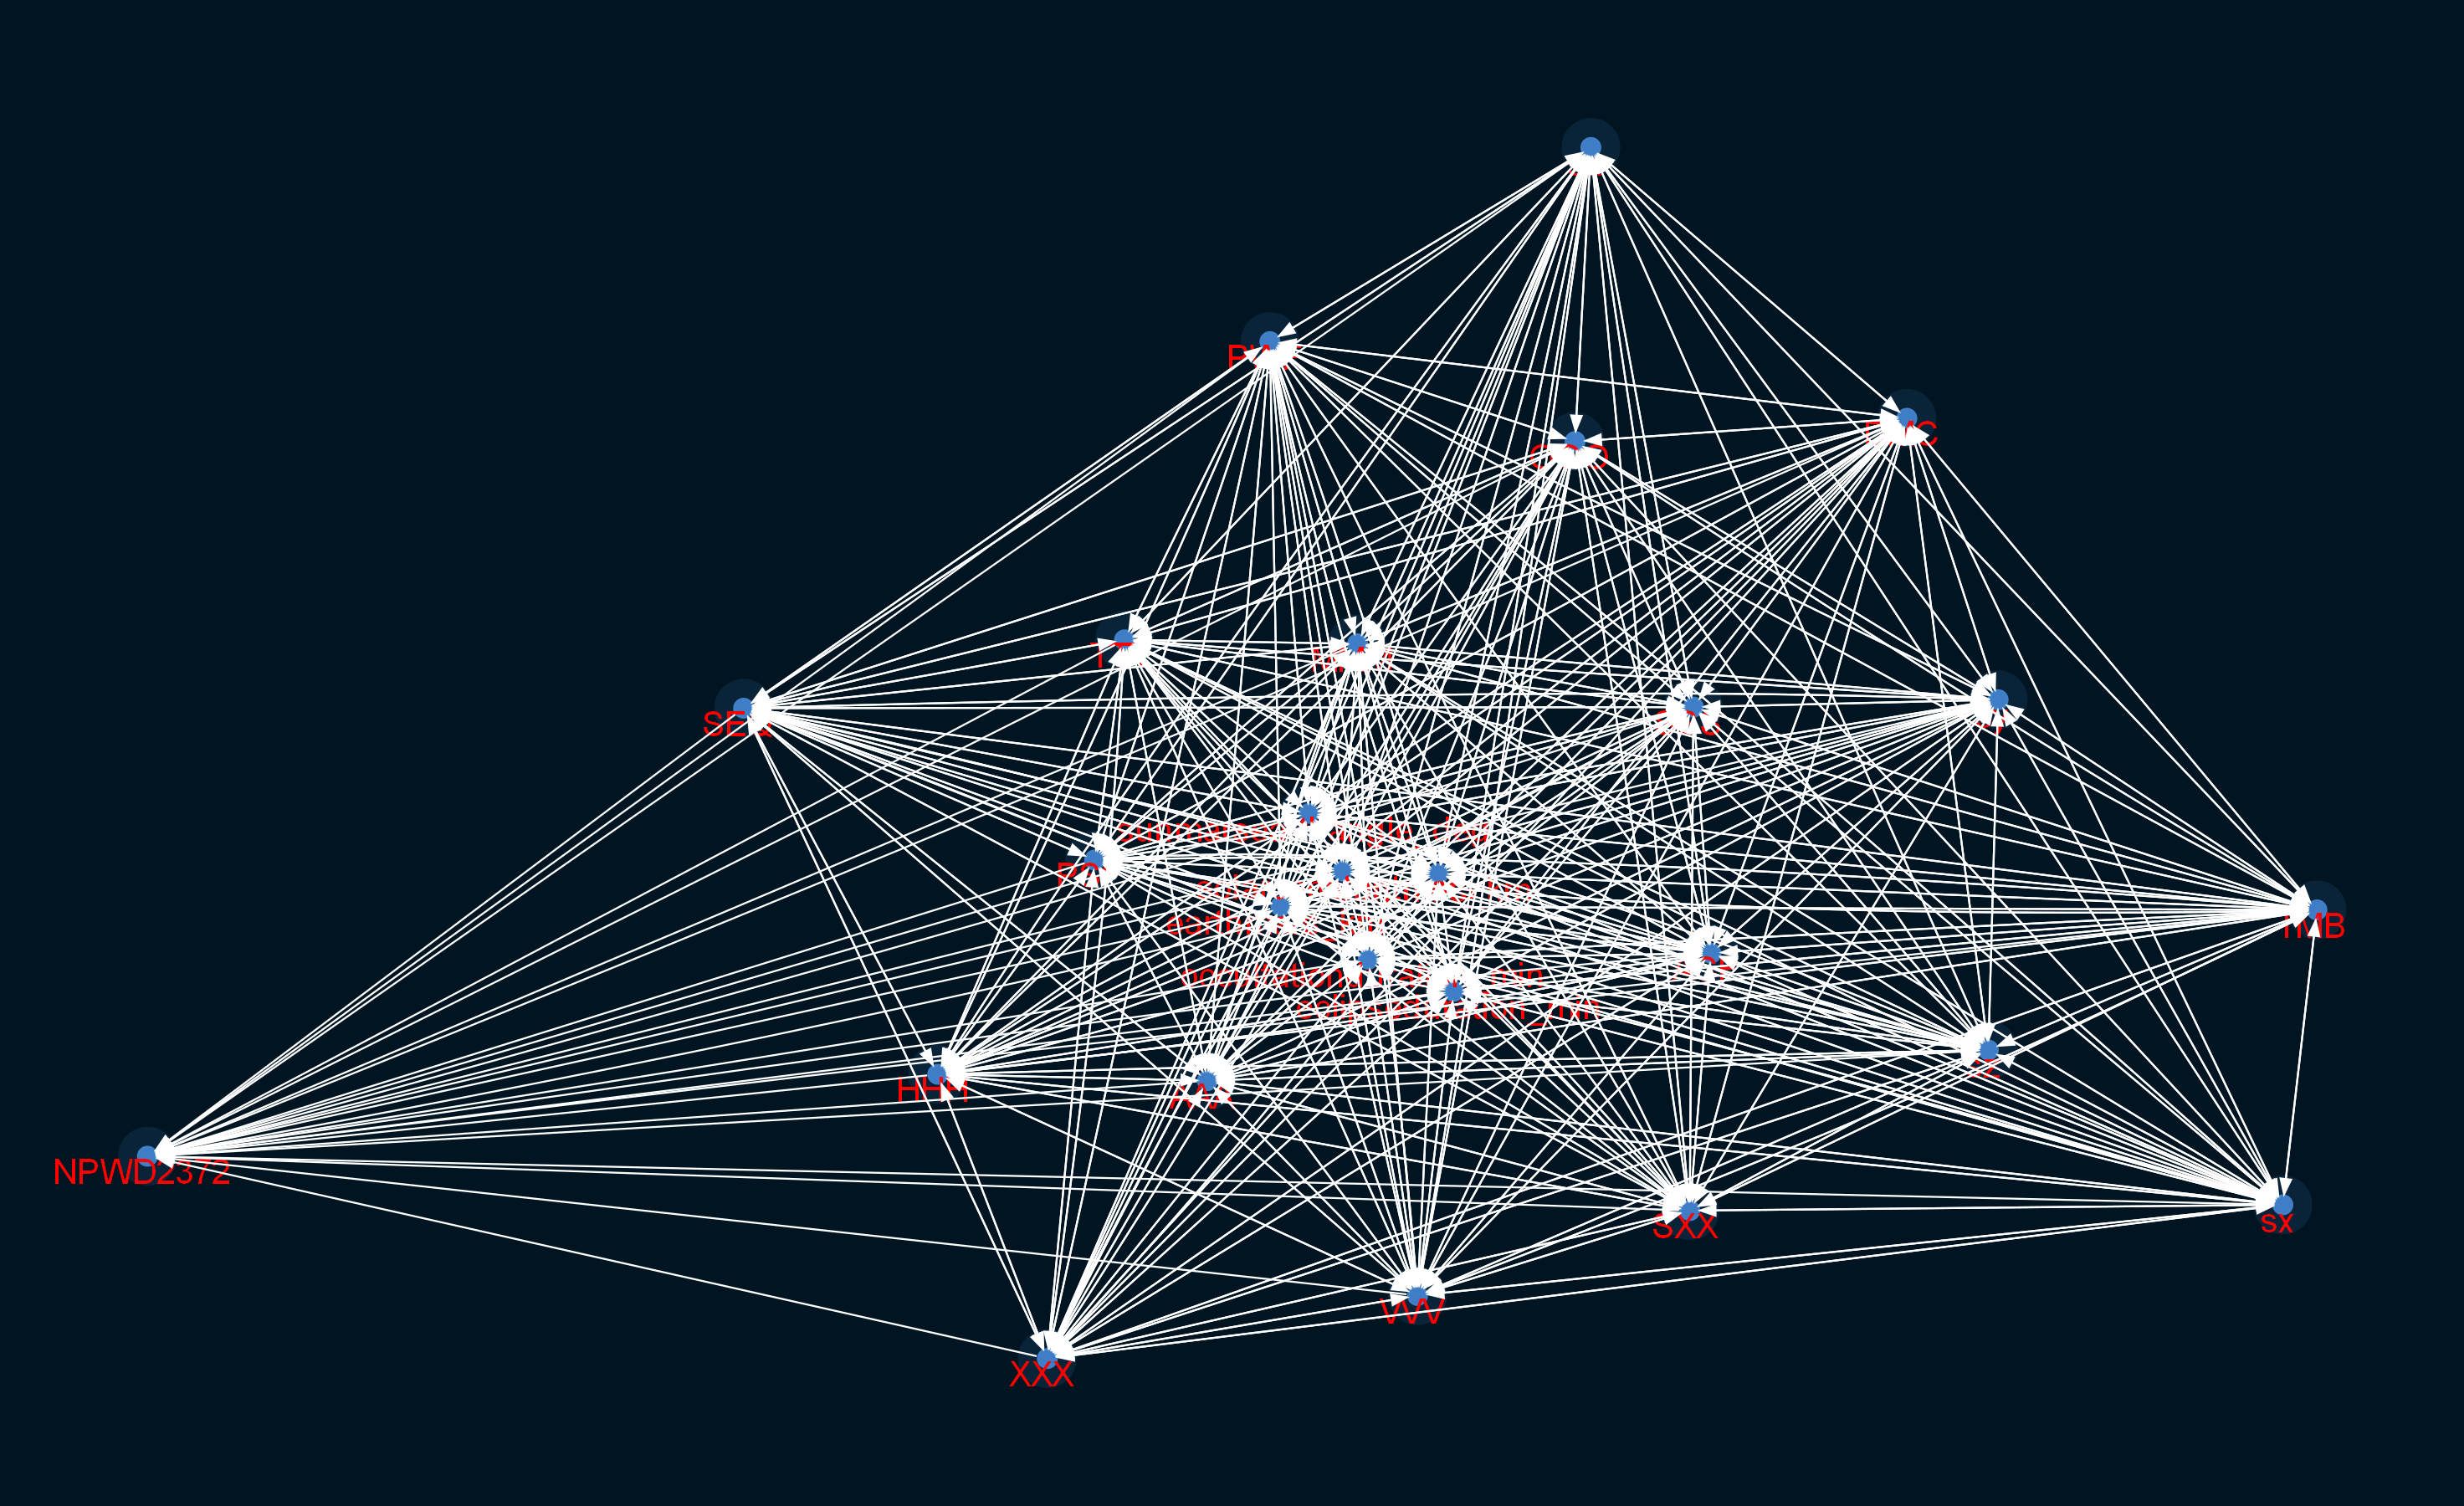

In [6]:
# Es difícil de imaginar cómo las corrientes NPWD pueden influir en la distancia de marte al sol y a la tierra. Nos quedamos solo con relaciones de NPWD a sunmars_km y earthmars_km
# Primero seleccionamos estas aristas del grafo en el dataframe y después las descartamos en nuestro objeto de CausalnexDataset.
# Representamos el grafo resultante

edges = a.get_all_edges()

edges_to_remove = [(u, v) for u, v, w in edges if npwd_node == u]

a.remove_edges(edges_to_remove)

viz = a.get_graph(specific_nodes=npwd_node)

Image(viz.draw(format="png"))


In [9]:
# Sigue habiendo demasiadas relaciones así que examinamos el dataframe para ver en que punto podemos cortar

df = a.edges_to_dataframe(specific_nodes=npwd_node)
df

source    target        weight
0                        sa  NPWD2372  2.989721e-08
1                        sx  NPWD2372  1.613901e-07
2                        sy  NPWD2372  7.832404e-07
3                        sz  NPWD2372  7.528631e-07
4                sunmars_km  NPWD2372  2.649404e-13
5              earthmars_km  NPWD2372  3.135225e-12
6     sunmarsearthangle_deg  NPWD2372  5.392598e-09
7         solarconstantmars  NPWD2372  1.416512e-07
8       eclipseduration_min  NPWD2372  3.839260e-09
9   occultationduration_min  NPWD2372  4.180601e-09
10                      AAA  NPWD2372  5.114974e-10
11                      HHH  NPWD2372  1.065411e-10
12                      MMM  NPWD2372  3.929403e-10
13                      OOO  NPWD2372  8.144160e-11
14                      PSF  NPWD2372  6.238660e-10
15                      PWF  NPWD2372  1.013374e-11
16                      SEQ  NPWD2372  8.184714e-12
17                      SSS  NPWD2372  9.799646e-11
18                      SXX  NPWD2372  1.991862e-11
19                      TMB  NPWD2372  8.358954e-12
20                      TTT  NPWD2372  1.676153e-10
21                      VVV  NPWD2372  9.474086e-11
22                      XXX  NPWD2372  2.897936e-11
23                      ACF  NPWD2372  3.738383e-10
24                      DMC  NPWD2372  3.902148e-12

In [10]:

df.describe()

weight
count  2.500000e+01
mean   7.539951e-08
std    2.126430e-07
min    2.649404e-13
25%    1.991862e-11
50%    1.676153e-10
75%    4.180601e-09
max    7.832404e-07

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:391: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding),

Run Image(result.draw(format='png')) to draw the graph


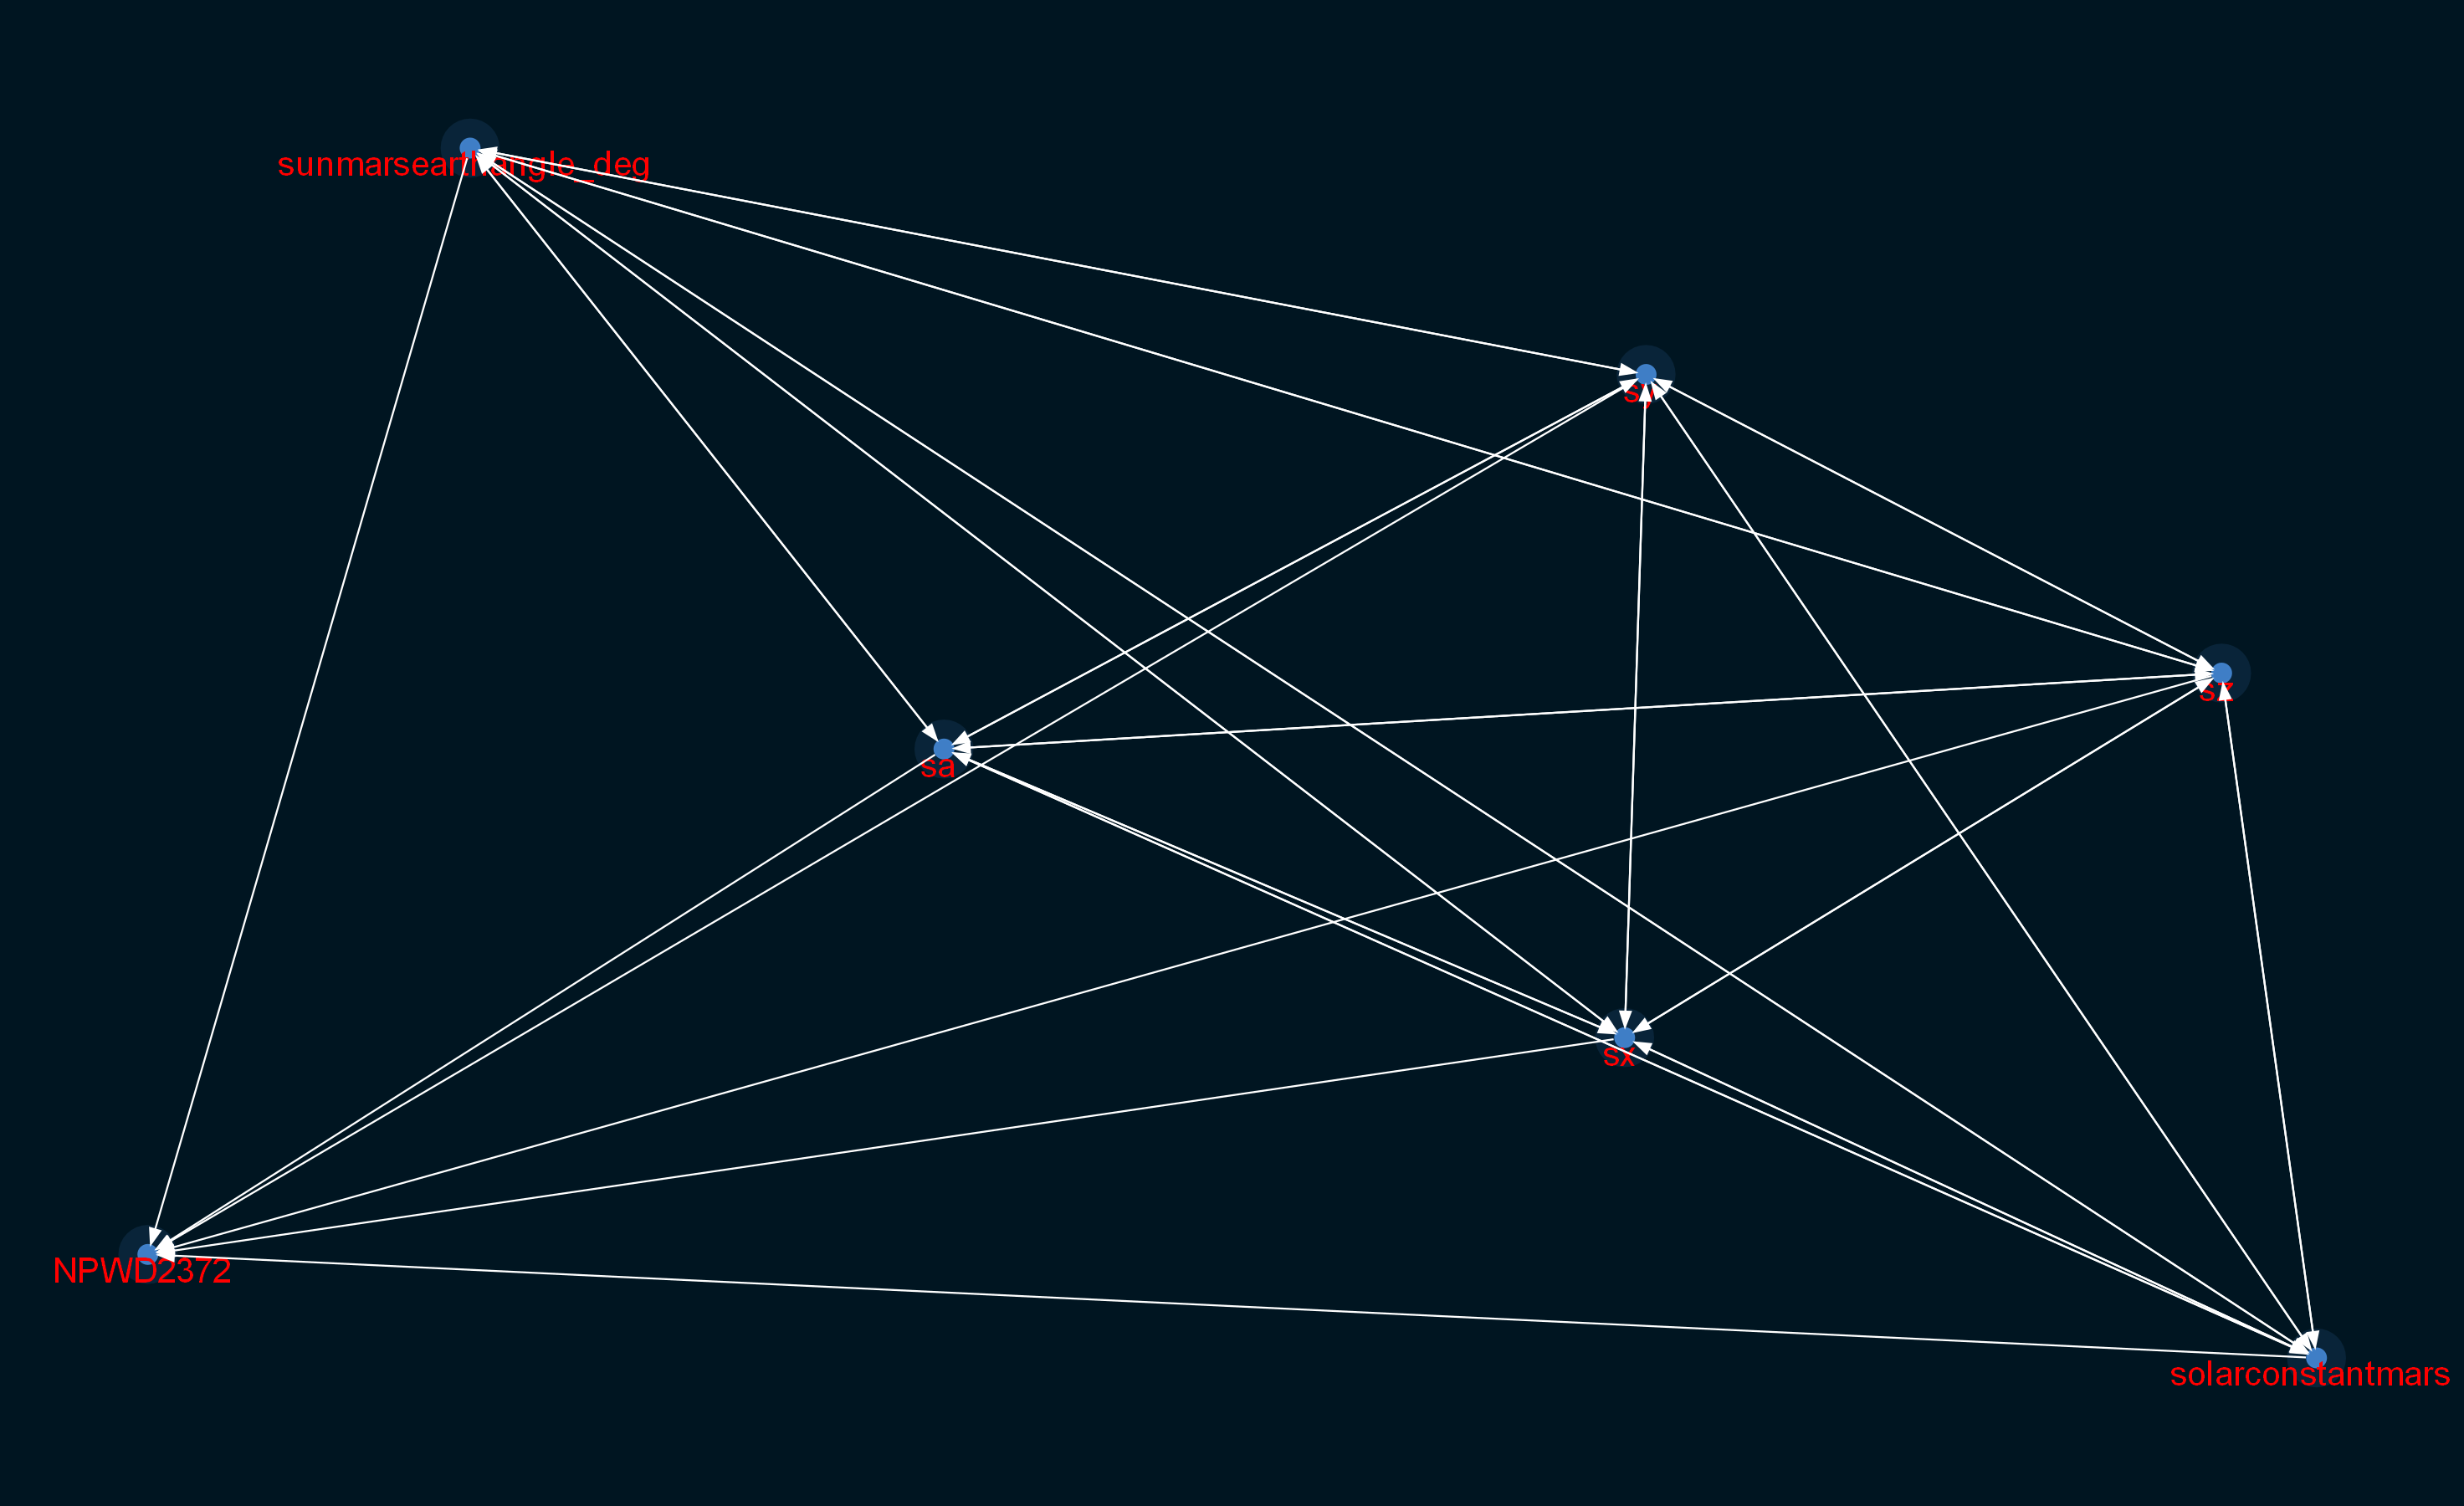

In [11]:
# Nos quedamos con el cuartil 3

q3 = 4.180601e-09
a.reset_threshold(threshold=q3, keep_previous_changes=True)
viz = a.get_graph(specific_nodes=npwd_node)
Image(viz.draw(format = "png"))

Run Image(result.draw(format='png')) to draw the graph


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


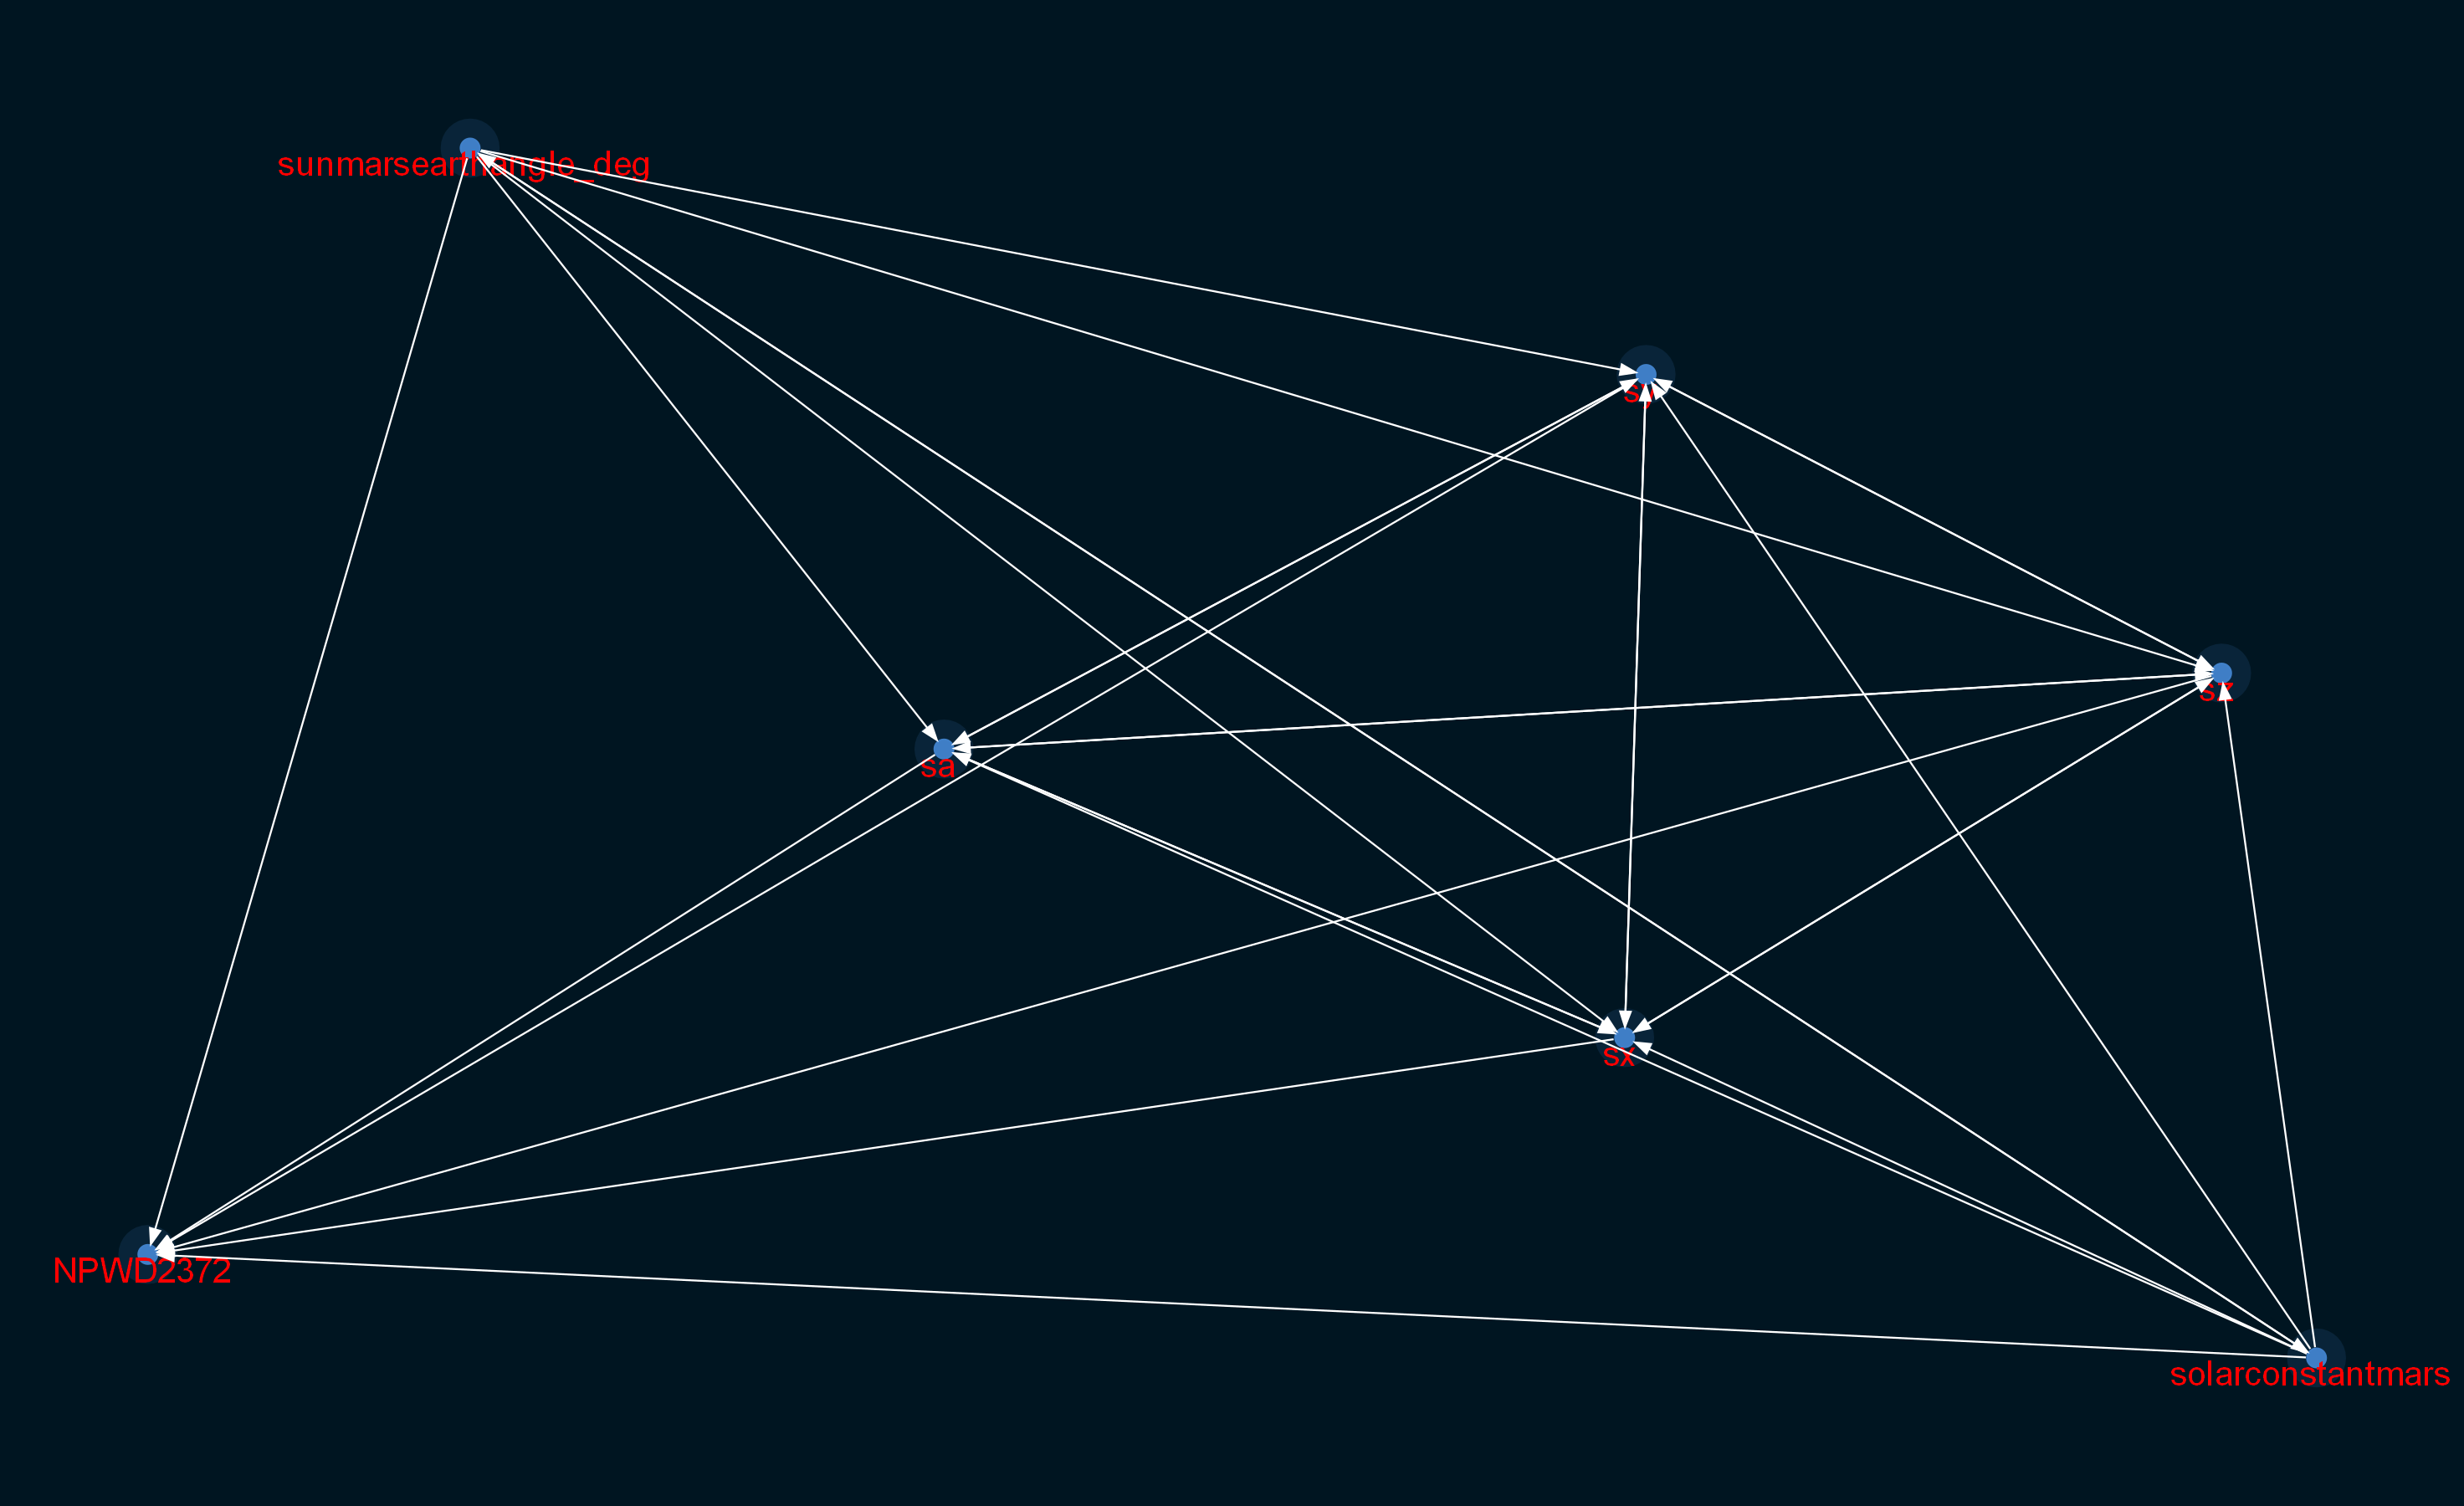

In [12]:
# En este resultado podemos detectar varias relaciones espurias, en concreto las que que se dirigen desde los ángulos de apuntamiento a la constante solar y al ángulo tierra-marte-sol.
# Procederemos a quitar estas relaciones 

edges_to_remove = [ ("sa", "solarconstantmars"), ("sa", "sunmarsearthangle_deg"), 
                    ("sx", "solarconstantmars"), ("sx", "sunmarsearthangle_deg"),
                    ("sy", "solarconstantmars"), ("sy", "sunmarsearthangle_deg"), 
                    ("sz", "sunmarsearthangle_deg"), ("sz", "solarconstantmars")]

a.remove_edges(edges=edges_to_remove)


viz = a.get_graph(specific_nodes=npwd_node)
Image(viz.draw(format = "png"))